In [9]:
import nglview as nv

v = nv.demo()
v.clear()
v.add_cartoon('protein', color='residueindex')
v

NGLWidget()

In [10]:
im = v.render_image() # non blocking
im

Image(value=b'', width='99%')

In [11]:
import threading
import time

# Save to disk
def write_image(fname, im_widget):
    with open(fname, 'wb') as fh:
        fh.write(im_widget.value)

def write_image_threaded(fname, im_widget):
    thread = threading.Thread(target=write_image, args=(fname, im_widget))
    thread.start()
    return thread

def wait_until_finished(widget):
    while not widget.value:
        time.sleep(0.1)
    return widget

def wait_until_finished_threaded(widget, callback):
    def target():
        result = wait_until_finished(widget)
        callback(result)
    thread = threading.Thread(target=target)
    thread.start()
    return thread

# Callback functions to handle the results
def on_red_finished(ired):
    write_image_threaded('red_render.png', ired)

def on_blue_finished(iblue):
    write_image_threaded('blue_render.png', iblue)

# Blocking render_image to call it multiple times in a single notebook cell
v.update_cartoon(color='red')
wait_until_finished_threaded(v.render_image(), on_red_finished)

v.update_cartoon(color='blue')
wait_until_finished_threaded(v.render_image(), on_blue_finished)

<Thread(Thread-38 (target), started 10804703232)>

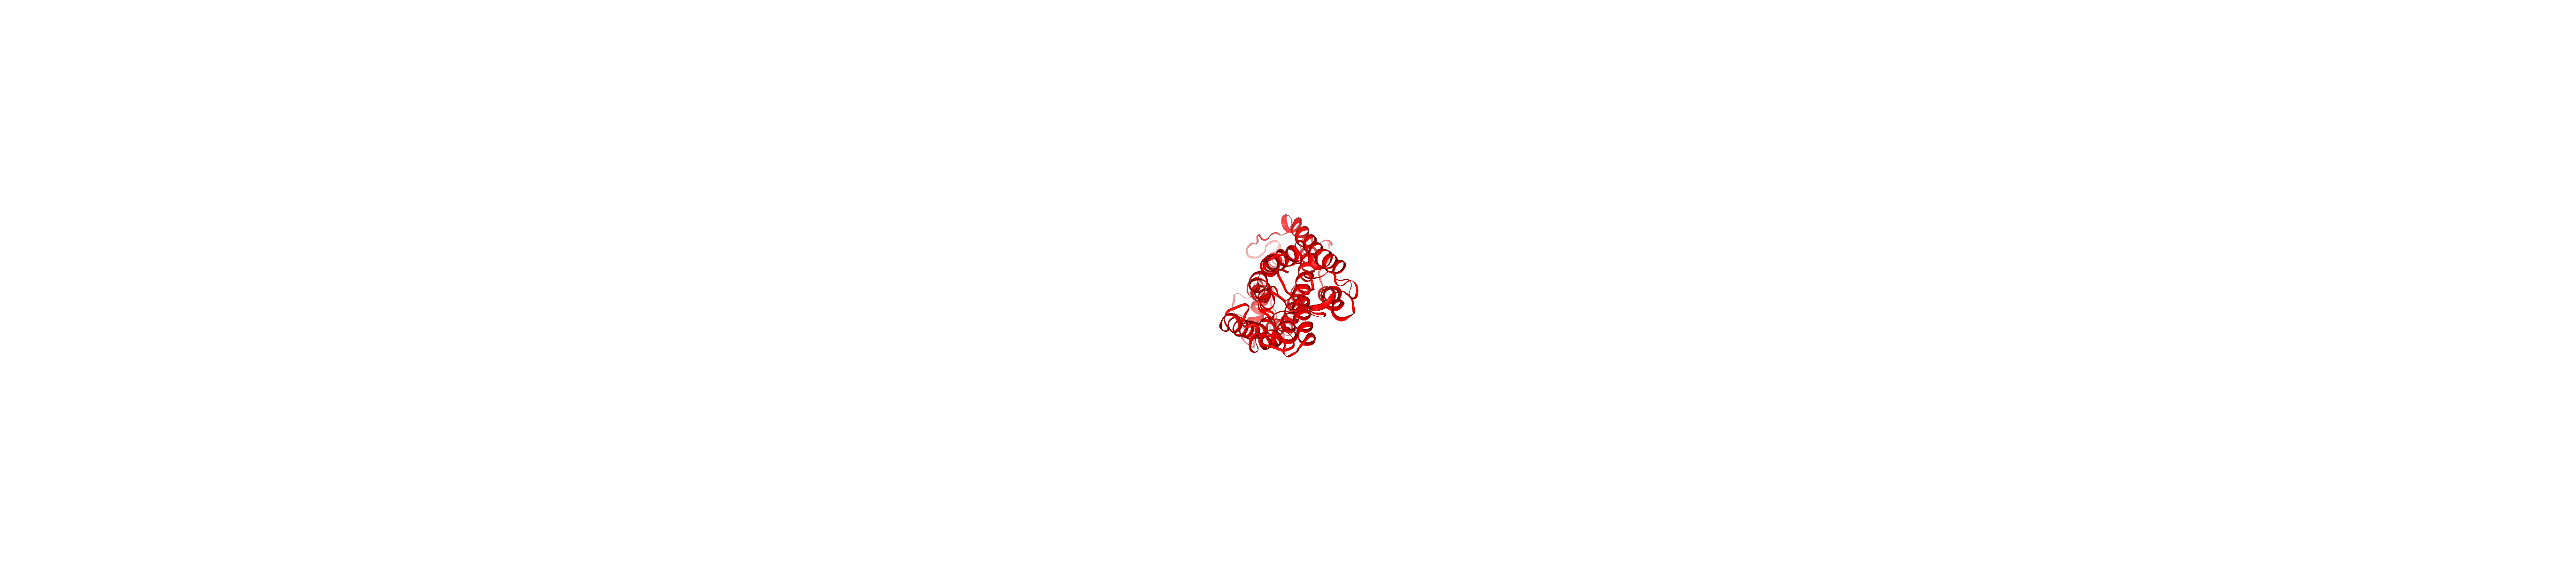

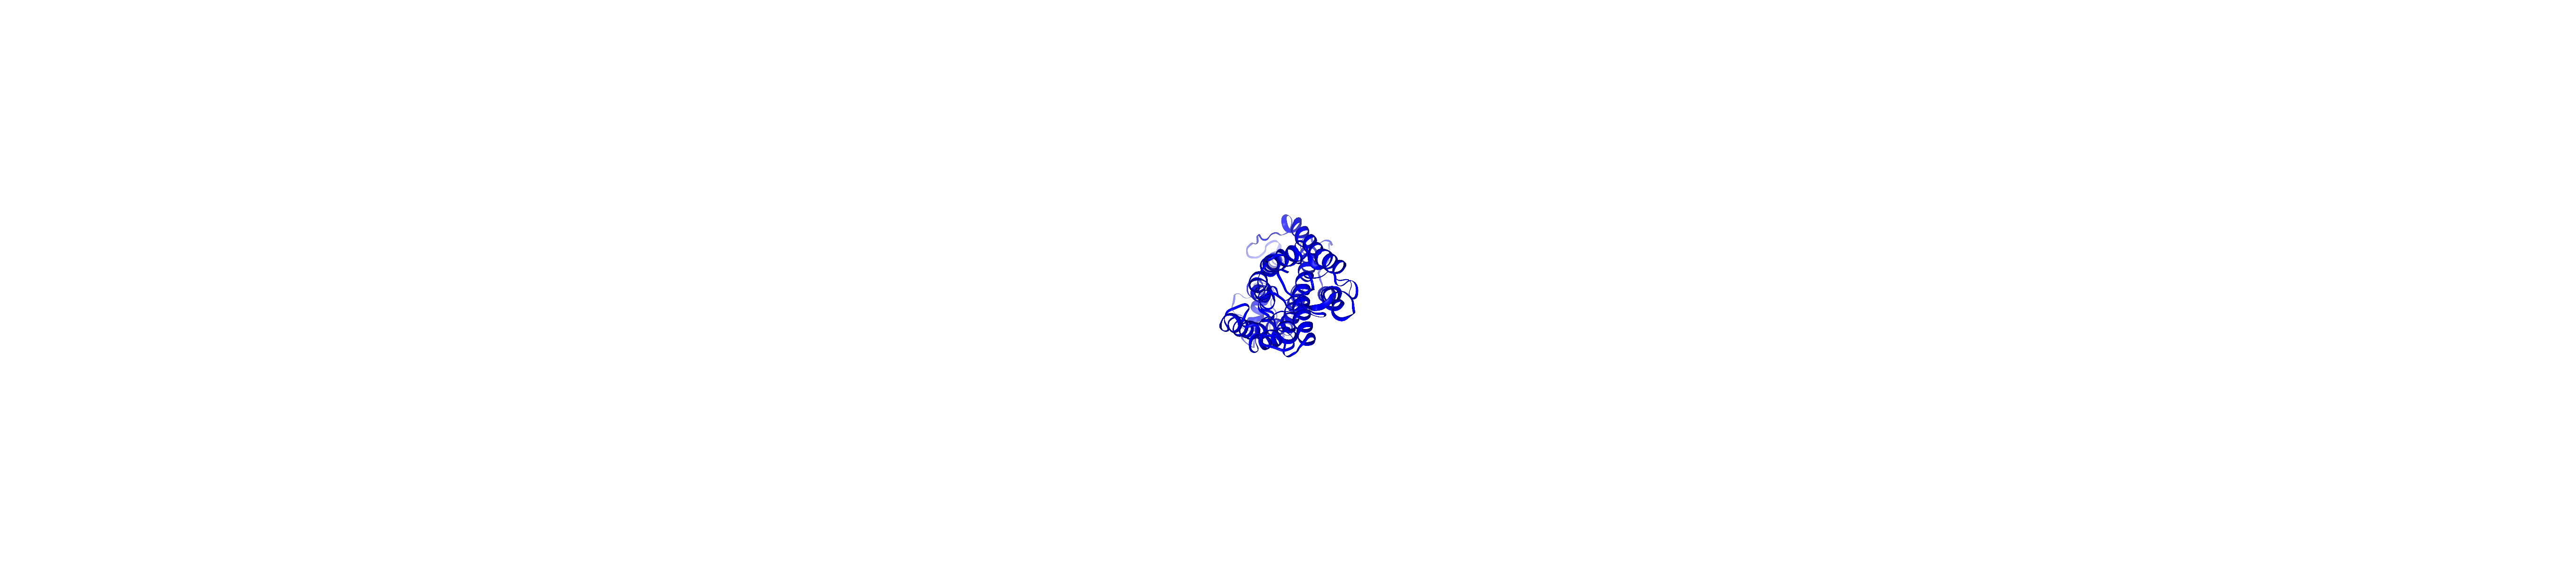

In [12]:
def display_many(*args):
    from IPython.display import display, Image
    for w in args:
        display(Image(w))

display_many('red_render.png', 'blue_render.png')